In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [68]:
sold = pd.read_csv('/content/drive/MyDrive/Dataset/Cafe+-+Sell+Meta+Data.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Dataset/Cafe+-+Transaction+-+Store.csv')
date_info = pd.read_csv('/content/drive/MyDrive/Dataset/Cafe+-+DateInfo.csv')

In [74]:
sold.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


In [75]:
sold.describe(include = ['O']) 

,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [70]:
sold[sold.isnull().any(axis=1)] #check for any null data

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


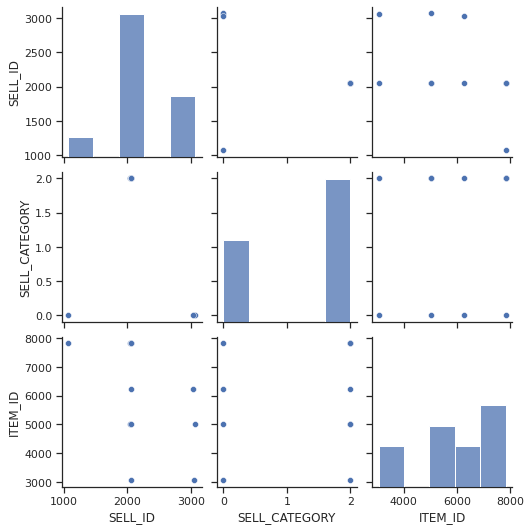

In [73]:
sns.pairplot(sold)

In [76]:
transactions.describe()

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


In [77]:
transactions.describe(include = ['O'])

,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [78]:
transactions[transactions.isnull().any(axis=1)] #check for any null data

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

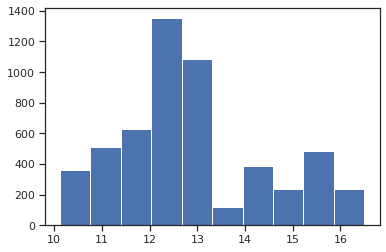

In [79]:
plt.hist(transactions.PRICE)

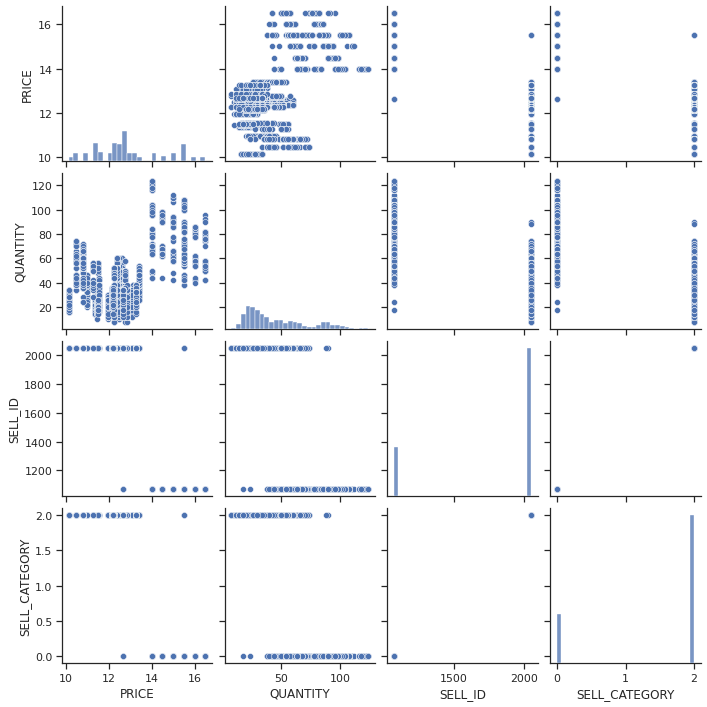

In [80]:
sns.pairplot(transactions)

In [81]:
date_info.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [82]:
date_info.describe(include = ['O'])

,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [83]:
date_info[date_info.isnull().any(axis=1)] #check for any null data

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
...,...,...,...,...,...,...,...
1344,9/6/15,2015,NaN,1,0,75.2,1
1345,9/7/15,2015,NaN,0,0,77.0,1
1346,9/8/15,2015,NaN,0,0,73.4,1
1347,9/9/15,2015,NaN,0,0,71.6,1


In [84]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday") # fill na values as no holiday

In [85]:
date_info[date_info.isnull().any(axis=1)] #check for any null data again after fillna

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


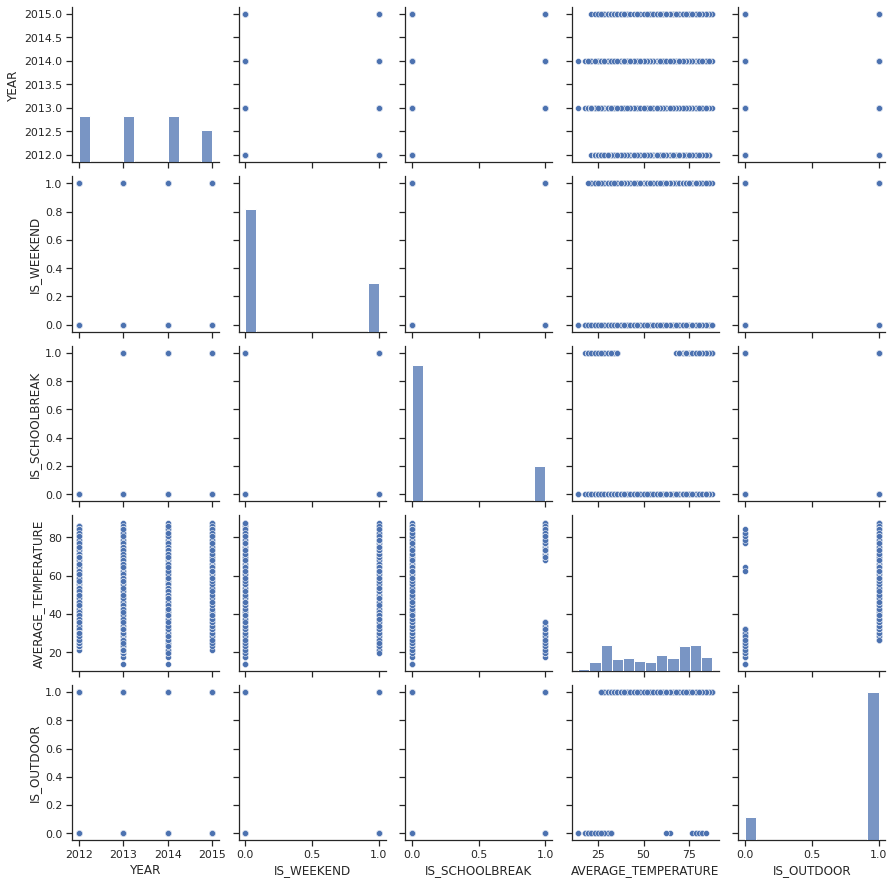

In [86]:
sns.pairplot(date_info)

# Data Preprocessing

In [87]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [88]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [89]:
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

In [90]:
b.head()

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.5     46
                                   01/01/13       15.5     60
                                   01/01/14       15.5     72
                                   01/01/15       14.0     66
                                   01/02/12       15.5     70
Name: QUANTITY, dtype: int64

In [91]:
b.tail()

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
2053     2              COKE       9/29/13        10.45    40
                                   9/29/14        12.77    46
                                   9/30/12        12.42    38
                                   9/30/13        10.45    38
                                   9/30/14        12.77    50
Name: QUANTITY, dtype: int64

In [92]:
data1.shape
intermediate_data = b.reset_index()

In [93]:
data1.shape

(10808, 6)

In [94]:
b.shape

(10792,)

In [95]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [96]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [97]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [98]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [99]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [101]:
print(np.unique(combined_data['HOLIDAY']))
print(np.unique(combined_data['IS_WEEKEND']))
print(np.unique(combined_data['IS_SCHOOLBREAK']))

['Dragon Boat Festivel' 'Labor Day' 'Luner New Year' 'Mid-Autumn Day'
 'No Holiday']
[0 1]
[0 1]


In [102]:
normalday_df = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]

In [103]:
normalday_df[normalday_df.isnull().any(axis=1)] # normal day dataset -> without influence of holiday

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [104]:
print(np.unique(normalday_df['HOLIDAY']))
print(np.unique(normalday_df['IS_WEEKEND']))
print(np.unique(normalday_df['IS_SCHOOLBREAK']))

['No Holiday']
[0]
[0]


(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

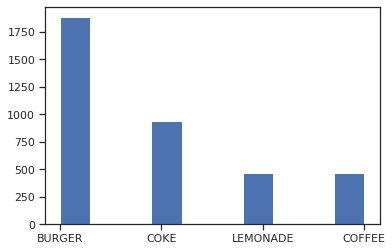

In [105]:
# Data exploration
plt.hist(normalday_df.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

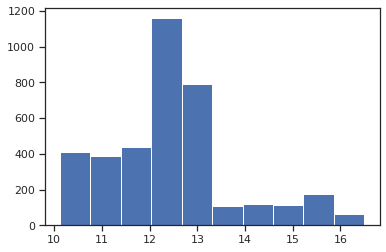

In [106]:
plt.hist(normalday_df.PRICE)

(array([894., 850., 704., 579., 240.,  65., 247., 126.,  47.,  16.]),
 array([ 16. ,  26.8,  37.6,  48.4,  59.2,  70. ,  80.8,  91.6, 102.4,
        113.2, 124. ]),
 <a list of 10 Patch objects>)

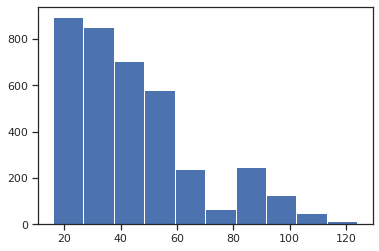

In [107]:
plt.hist(normalday_df.QUANTITY)

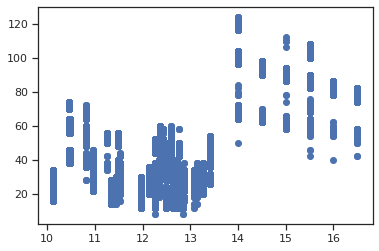

In [108]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

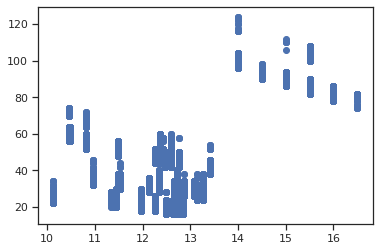

In [110]:
plt.scatter(normalday_df['PRICE'], normalday_df['QUANTITY'])

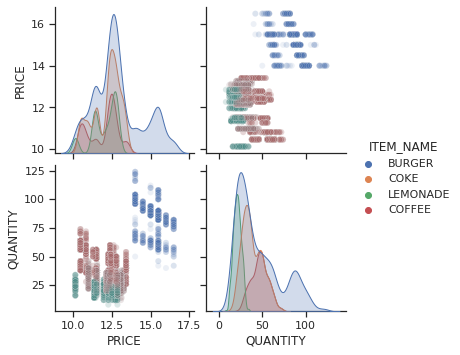

In [111]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

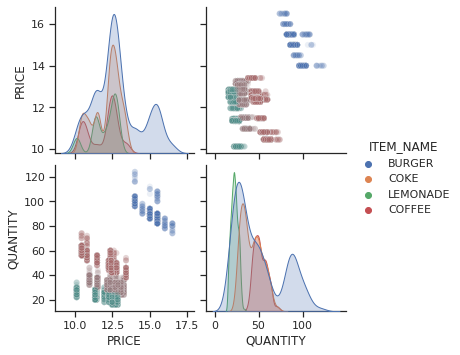

In [112]:
sns.pairplot(normalday_df[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

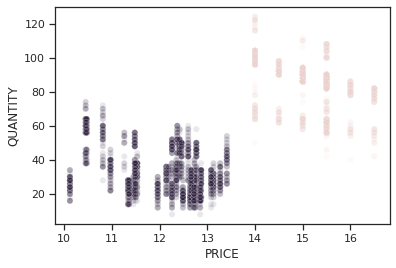

In [117]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER'] 
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

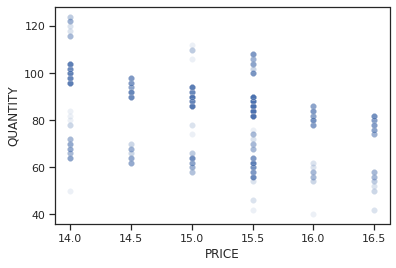

In [118]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)] # with burger only

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

In [120]:
# combined_data.to_csv('/content/drive/MyDrive/Dataset/CafeCombinedData.csv')
# normalday_df.to_csv('/content/drive/MyDrive/Dataset/CafeWithoutHoliday.csv')

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.45e-32
Time:                        07:54:49   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

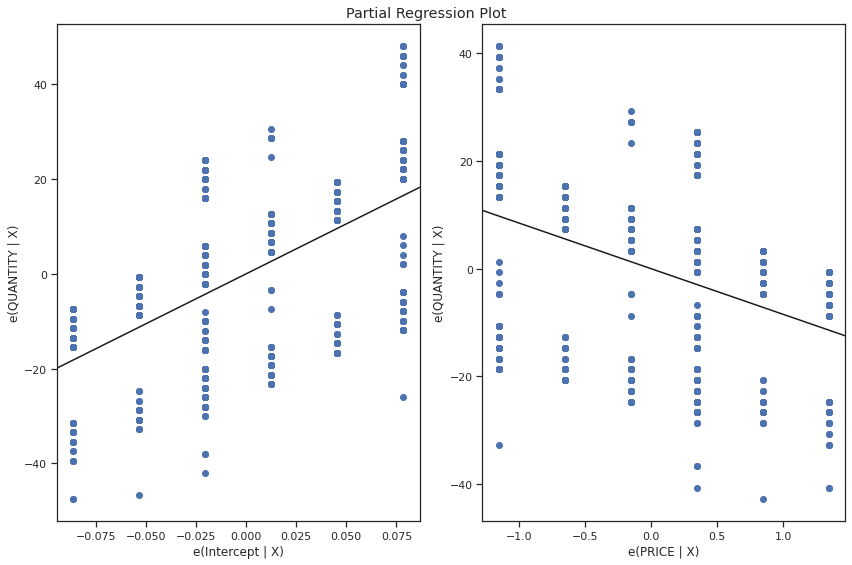

In [119]:
# This is for the combined data
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

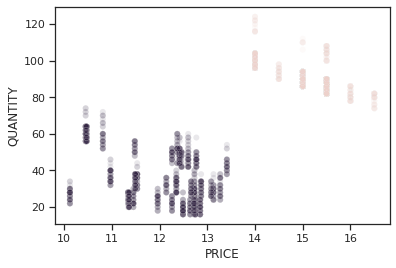

In [124]:
burger = normalday_df[normalday_df['ITEM_NAME'] == 'BURGER'] # without holiday, burger only

sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY, hue = 'SELL_ID', alpha = 0.1, legend = False)

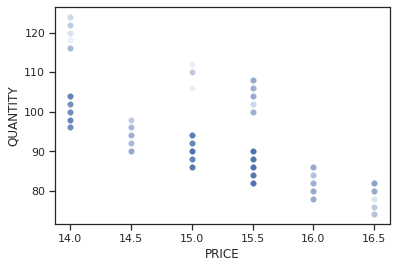

In [125]:
nd_burger_1070 = normalday_df[(normalday_df['ITEM_NAME'] == 'BURGER') & (normalday_df['SELL_ID'] == 1070)]
sns.scatterplot(data = nd_burger_1070, x = nd_burger_1070.PRICE, y = nd_burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           7.16e-70
Time:                        07:59:20   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

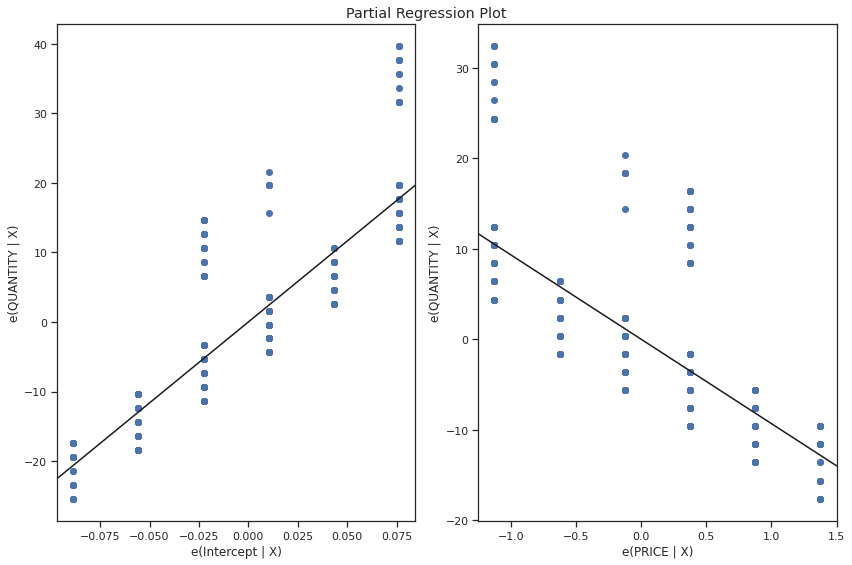

In [126]:
nd_burger_model = ols("QUANTITY ~ PRICE", data=nd_burger_1070).fit()
print(nd_burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(nd_burger_model, fig=fig)

In [127]:
# further experiment with other columns 
exp1_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

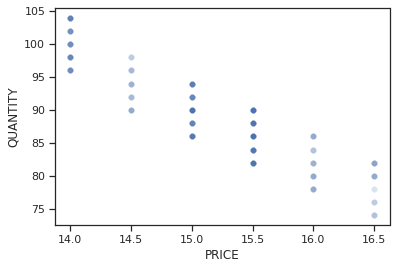

In [130]:
df_exp1 = exp1_data[(exp1_data['ITEM_NAME'] == 'BURGER') & (exp1_data['SELL_ID'] == 1070)]
sns.scatterplot(data = df_exp1, x = df_exp1.PRICE, y = df_exp1.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          5.51e-153
Time:                        08:02:17   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

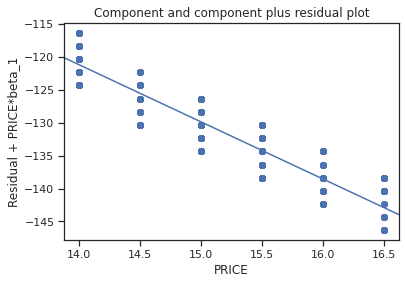

In [132]:
exp1_model = ols("QUANTITY ~ PRICE", data=df_exp1).fit()
print(exp1_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(exp1_model, "PRICE")

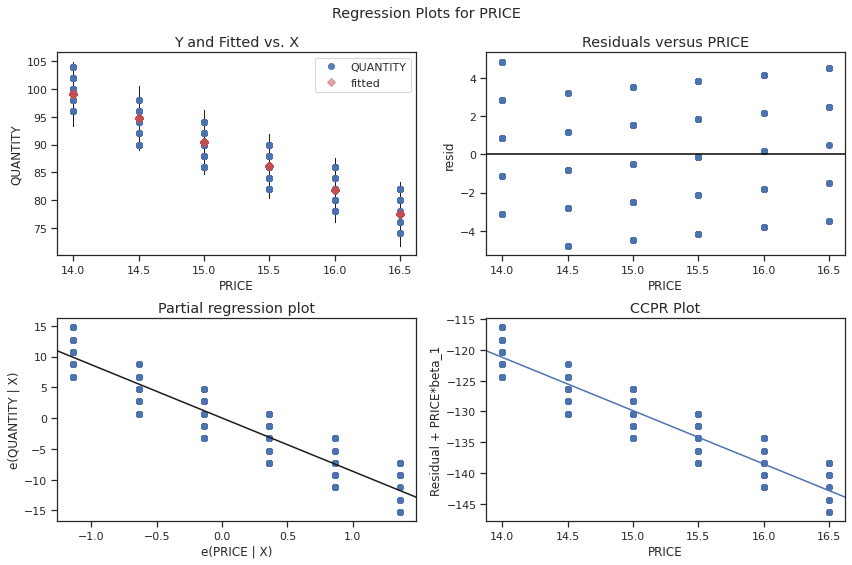

In [133]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(exp1_model, "PRICE", fig=fig)

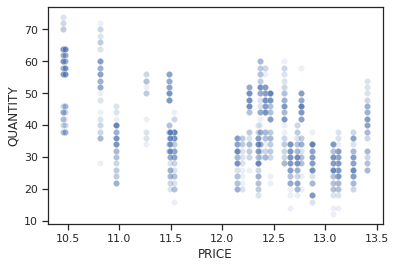

In [145]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.94e-104
Time:                        08:07:25   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

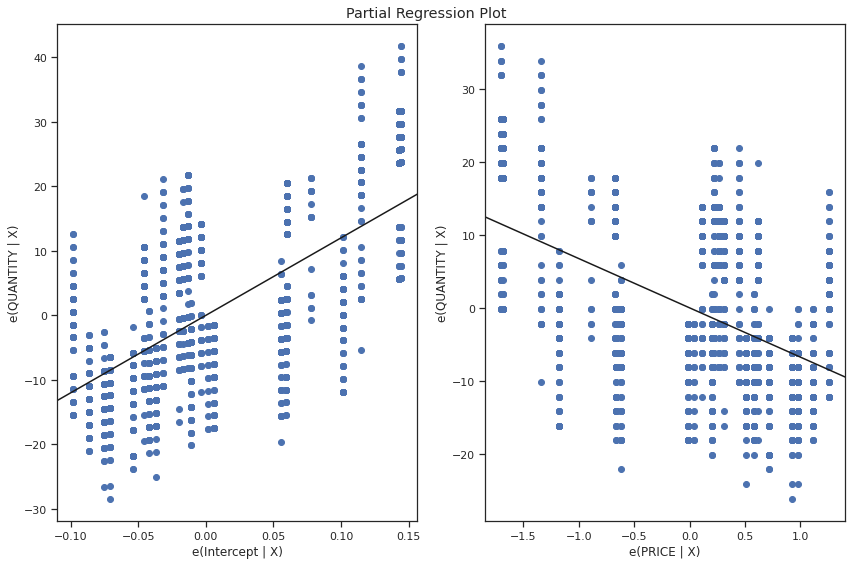

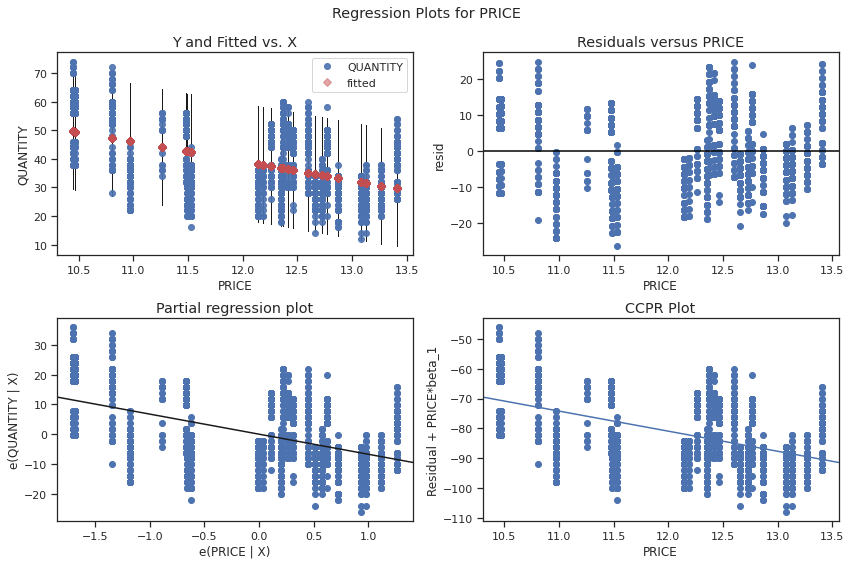

In [146]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

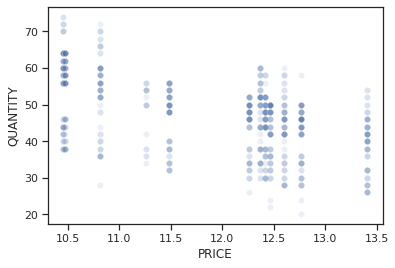

In [147]:
coffee = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           6.20e-62
Time:                        08:08:30   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

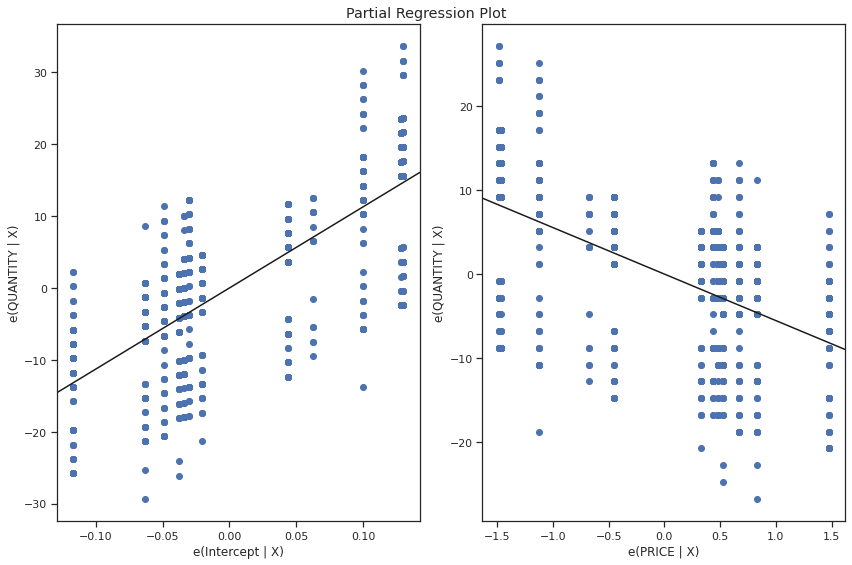

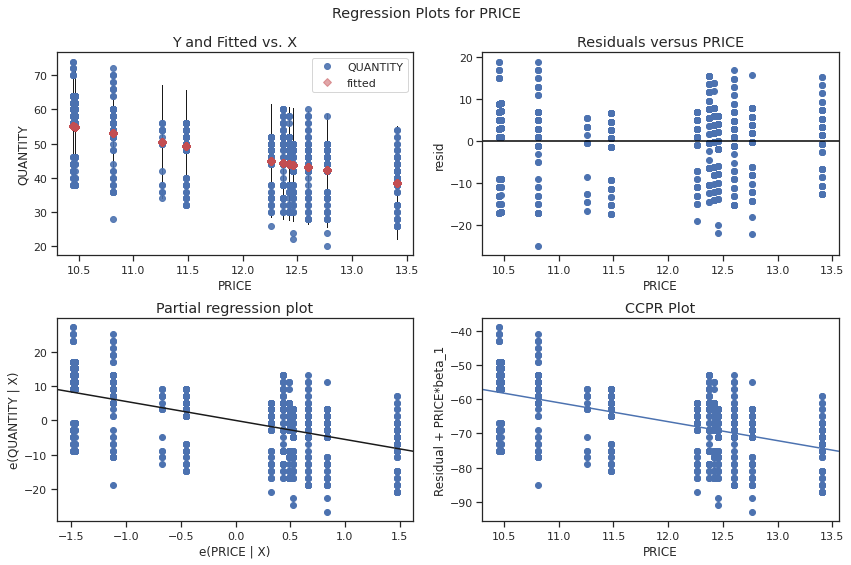

In [148]:
coffee_model = ols("QUANTITY ~ PRICE", data=coffee).fit()
print(coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coffee_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coffee_model, 'PRICE', fig=fig)

# Calculcate Price Elasticity for each different product

In [149]:
elasticities = {}

def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -8.466015765397351
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.45e-32
Time:                        08:09:47   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


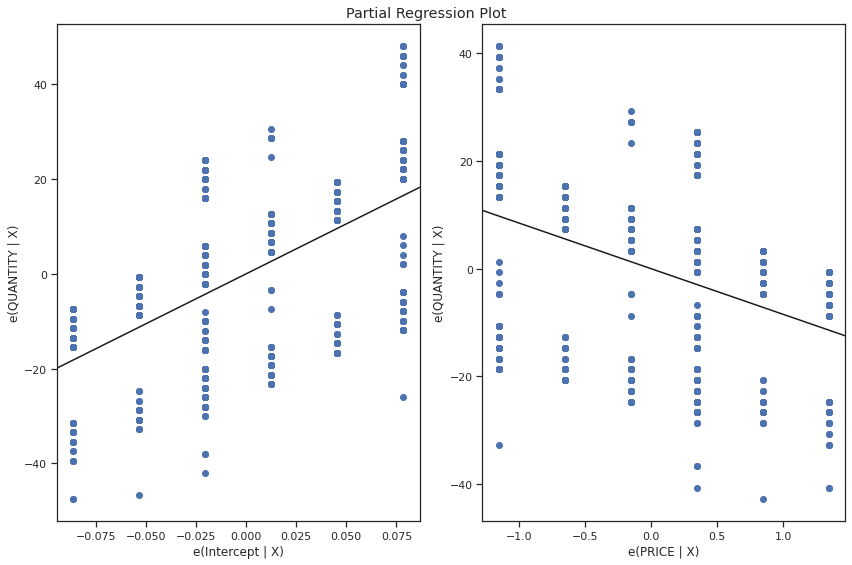

In [150]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -8.658581488470567
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          5.51e-153
Time:                        08:11:06   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


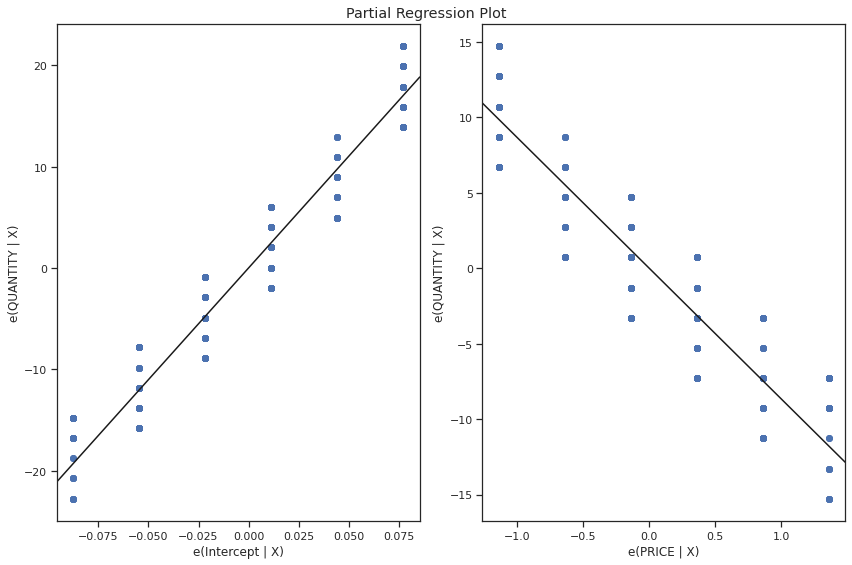

In [152]:
price_elasticity, nd_model_burger_1070 = create_model_and_find_elasticity(df_exp1)
elasticities['nd_burger_1070'] = price_elasticity

Price elasticity of the product: -6.745224661560989
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.94e-104
Time:                        08:11:36   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


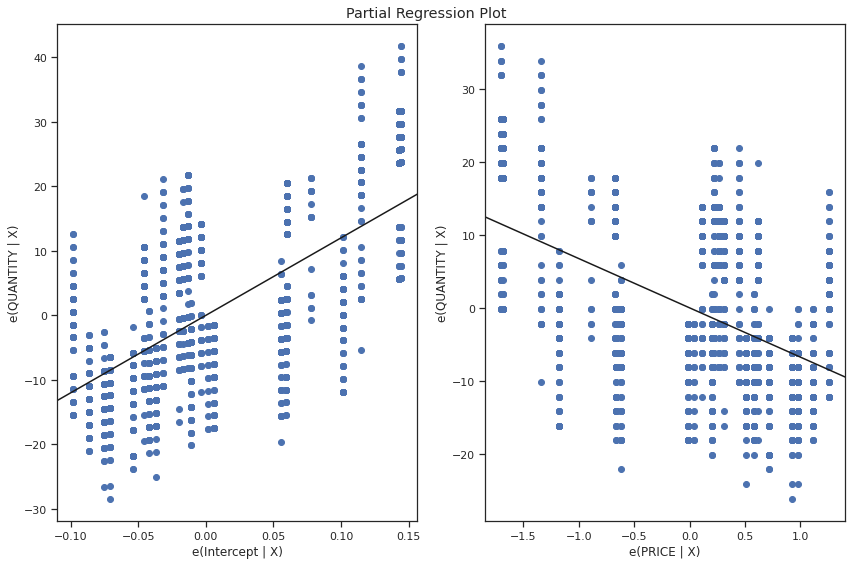

In [153]:
price_elasticity, coke_model = create_model_and_find_elasticity(coke)
elasticities['coke_model'] = price_elasticity

Price elasticity of the product: -7.386690550461051
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     459.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.83e-83
Time:                        08:13:29   Log-Likelihood:                -3447.8
No. Observations:                 942   AIC:                             6900.
Df Residuals:                     940   BIC:                             6909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


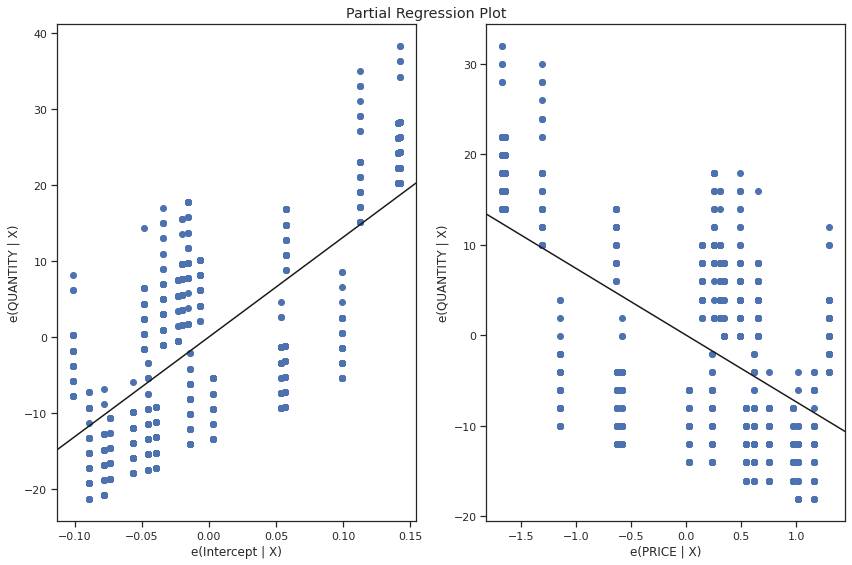

In [155]:
coke_exp1 = normalday_df[normalday_df['ITEM_NAME'] == 'COKE']
price_elasticity, nd_coke_model = create_model_and_find_elasticity(coke_exp1)
elasticities['nd_coke_model'] = price_elasticity

Price elasticity of the product: -5.547610244996747
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           6.20e-62
Time:                        08:11:54   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


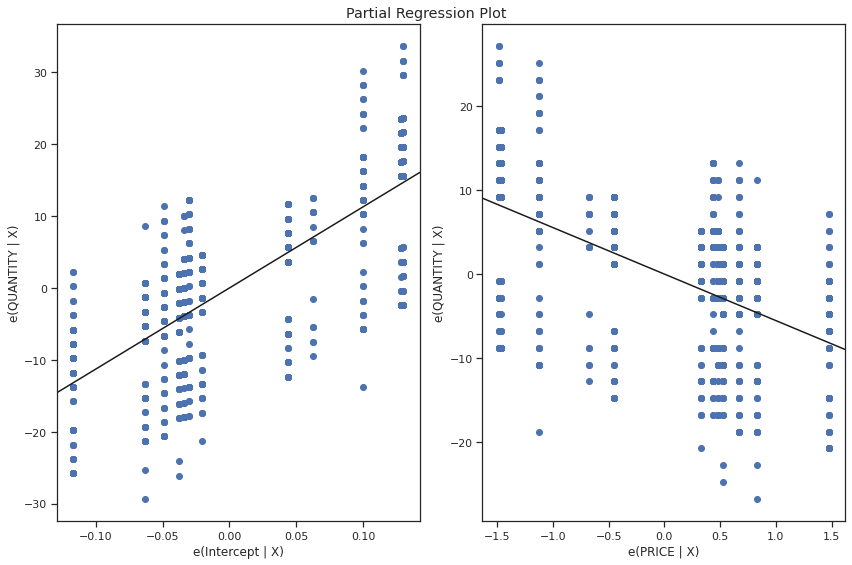

In [154]:
price_elasticity, coffee_model = create_model_and_find_elasticity(coffee)
elasticities['coffee_model'] = price_elasticity

Price elasticity of the product: -6.1298209763560845
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     929.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.38e-113
Time:                        08:13:55   Log-Likelihood:                -1348.7
No. Observations:                 471   AIC:                             2701.
Df Residuals:                     469   BIC:                             2710.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

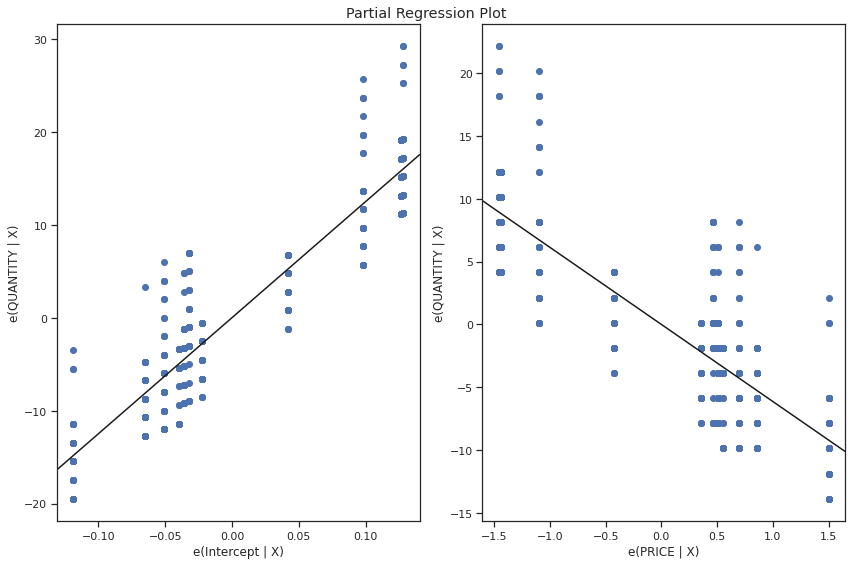

In [156]:
coffee_exp1 = normalday_df[normalday_df['ITEM_NAME'] == 'COFFEE']
price_elasticity, nd_coffee_model = create_model_and_find_elasticity(coffee_exp1)
elasticities['nd_coffee_model'] = price_elasticity

In [157]:
elasticities

{'burger_1070': -8.466015765397351,
 'coffee_model': -5.547610244996747,
 'coke_model': -6.745224661560989,
 'nd_burger_1070': -8.658581488470567,
 'nd_coffee_model': -6.1298209763560845,
 'nd_coke_model': -7.386690550461051}

# Prediction section 

In [202]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [203]:
start_price = 11
end_price = 21

In [204]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [205]:
test['QUANTITY'] = nd_model_burger_1070.predict(test['PRICE']) # try with the best model with highest R2 score

In [206]:
test.head()

,PRICE,QUANTITY
0,11.00,125.115570
1,11.01,125.028985
2,11.02,124.942399
3,11.03,124.855813
4,11.04,124.769227


In [207]:
test['PROFIT'] = (test["PRICE"] - 10) * test["QUANTITY"] # assume the cost for a burger alacarte set is 10

In [208]:
test.head()

,PRICE,QUANTITY,PROFIT
0,11.00,125.115570,125.115570
1,11.01,125.028985,126.279275
2,11.02,124.942399,127.441247
3,11.03,124.855813,128.601487
4,11.04,124.769227,129.759996


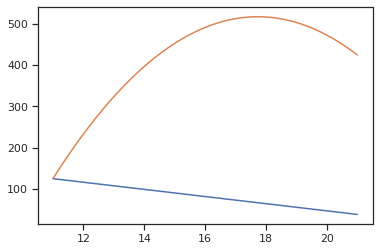

In [209]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

In [250]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0] # optimal price to obtain most profit
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
672,17.72,66.929903,516.69885


In [301]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    test['Elasticity'] = model.params[1]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]].values
    return values_at_max_profit

In [302]:
optimal_price = {}
buying_price = 8 # assume this is the cost

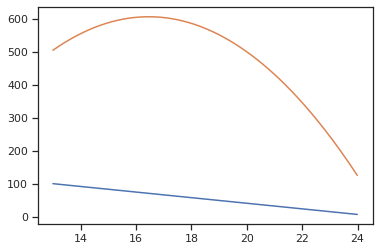

In [303]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

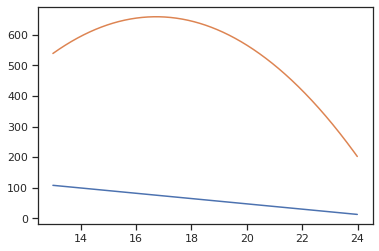

In [304]:
optimal_price['nd_burger_1070'] = find_optimal_price(nd_burger_1070, nd_model_burger_1070, buying_price)

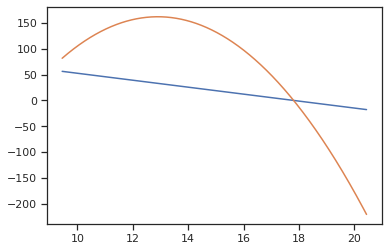

In [305]:
optimal_price['coke'] = find_optimal_price(coke, coke_model, buying_price)

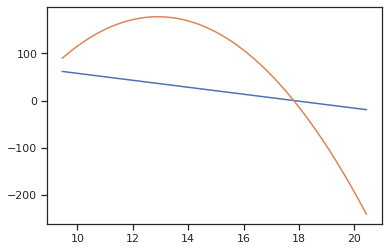

In [306]:
optimal_price['nd_coke'] = find_optimal_price(coke_exp1, nd_coke_model, buying_price)

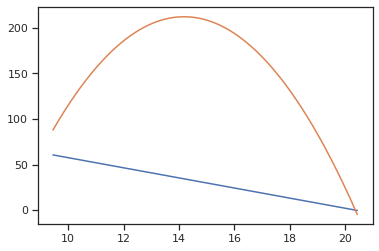

In [307]:
optimal_price['coffee'] = find_optimal_price(coffee, coffee_model, buying_price)

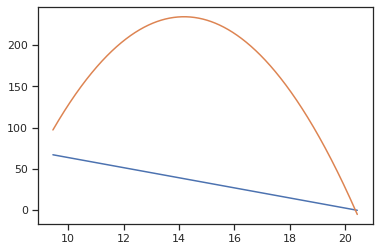

In [308]:
optimal_price['nd_coffee'] = find_optimal_price(coffee_exp1, nd_coffee_model, buying_price)

In [309]:
optimal_price

{'burger_1070': array([[ 16.46      ,  71.63525503, 606.03425751,  -8.46601577]]),
 'coffee': array([[ 14.19      ,  34.29098475, 212.26119561,  -5.54761024]]),
 'coke': array([[ 12.9       ,  33.10056442, 162.19276565,  -6.74522466]]),
 'nd_burger_1070': array([[ 16.72      ,  75.58848437, 659.13158374,  -8.65858149]]),
 'nd_coffee': array([[ 14.18      ,  37.9338079 , 234.43093283,  -6.12982098]]),
 'nd_coke': array([[ 12.91      ,  36.20000903, 177.74204435,  -7.38669055]])}

In [332]:
result = pd.DataFrame(array_res, columns=['Dataset','Optimal Price','Quantity','Max Profit','Elasticity'])

In [333]:
result

,Dataset,Optimal Price,Quantity,Max Profit,Elasticity
0,burger_1070,16.46,71.635255,606.034258,-8.466016
1,coffee,14.19,34.290985,212.261196,-5.547610
2,coke,12.90,33.100564,162.192766,-6.745225
3,nd_burger_1070,16.72,75.588484,659.131584,-8.658581
4,nd_coffee,14.18,37.933808,234.430933,-6.129821
5,nd_coke,12.91,36.200009,177.742044,-7.386691
